In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler,RobustScaler


import time
from numpy import log as ln

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
from kneed import KneeLocator



from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd



In [3]:
import utils


In [19]:
input_data=pd.read_csv('../data/input_data.csv').drop(columns=['Unnamed: 0'])
input_data['area_classification'] = input_data['area_classification'].astype('category')
name=pd.Categorical(input_data['area_classification']).codes

input_data['area_classification'] = name
# there is one null value
input_data['traffic_count']=np.where(input_data['traffic_count'].isna(),min(input_data['traffic_count']),input_data['traffic_count'])

input_data.head(2)
input_data['area_classification']=input_data['area_classification'].astype('category')
area_classification_mapping=dict(enumerate(input_data['area_classification'].cat.categories ))


In [20]:
input=pd.read_csv('../data/input_data.csv').drop(columns=['Unnamed: 0'])
input['classification'] = input_data['area_classification'].astype('category')

input[['classification','area_classification']]


,classification,area_classification
0,2,urban
1,2,urban
2,2,urban
3,1,suburban
4,1,suburban
5,1,suburban
6,1,suburban
7,1,suburban
8,2,urban
9,1,suburban


In [21]:
name


array([2, 2, 2, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1], dtype=int8)

In [22]:
input_data.head(2)


,zip_code,area_classification,traffic_count,population,household_total_income
0,34698,2,32500.0,38010,18161
1,33765,2,49000.0,13844,6126


In [23]:
input_data.shape


(38, 5)

# Feature selection


In [108]:
input_data=pd.read_csv('revised_input_data.csv').drop(columns=['Unnamed: 0'])



In [111]:
%store -r data1


In [112]:
data1.drop(columns=['zip_code','area_classification'],inplace=True)


KeyError: "['zip_code' 'area_classification'] not found in axis"

In [113]:
input_data=data1.copy()
input_data.drop(index=[4,19], inplace=True)


In [114]:
input_data.var()
input_data.dropna(inplace=True)
# indicate the spread of the data in each feature
# The high variance in traffic_count, population, and household_total_income
# Low variance suggests that most values in this feature are close to the mean.a lack of diversity in categories.
# standardizing features, especially for models sensitive to scale, such as linear regression, logistic regression, support vector machines (SVM), and k-means clustering. The `StandardScaler` standardizes features by removing the mean and scaling to unit variance (z-score normalization):


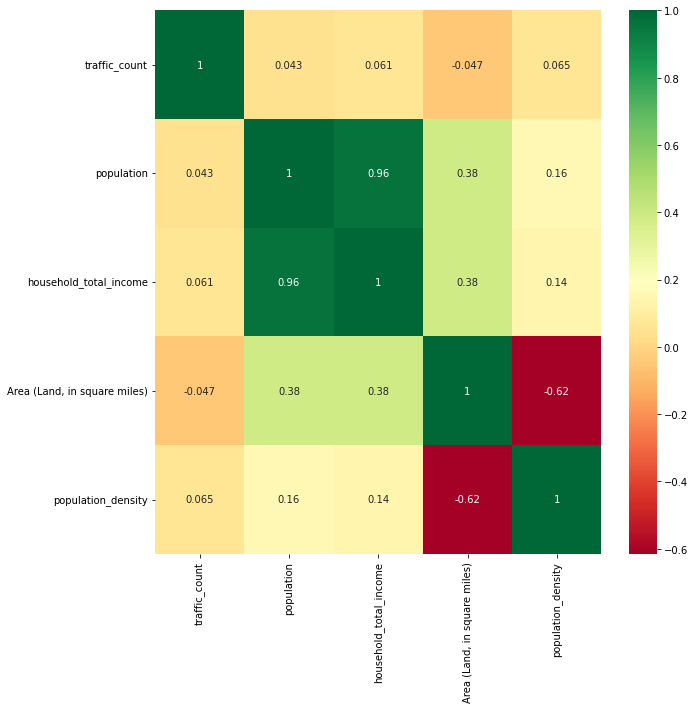

In [115]:
corrmat = input_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(input_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")


# data vizualization 2d/3d



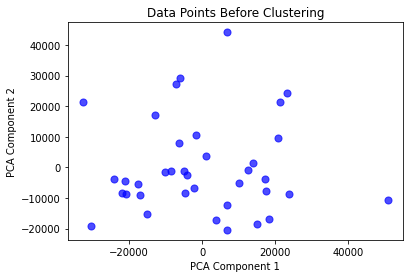

In [80]:
utils.twod(input_data)



In [81]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(input_data)
def twoD_tsne(scaled_data):
        tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,random_state=0)
        tsne_results = tsne.fit_transform(scaled_data)
        tsne_df = pd.DataFrame(data = tsne_results,columns=['tsne1','tsne2'])
        # tsne_df = pd.concat([tsne_df, pd.DataFrame({'cluster':labels})], axis=1)
        fig = px.scatter(tsne_df,x="tsne1", y="tsne2",
                         width=400, height=300,title='2D View of Data points')
        fig.show()  
twoD_tsne(scaled_data)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Indexed 37 samples in 0.000s...
[t-SNE] Computed neighbors for 37 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 2.712253
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.591362
[t-SNE] KL divergence after 1000 iterations: 0.320433


In [82]:
def threeD_tsne(scaled_data):
    tsne = TSNE(n_components=3, verbose=1, perplexity=30, n_iter=1000, random_state=0)
    tsne_results = tsne.fit_transform(scaled_data)
    
    tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2', 'tsne3'])
    
    fig = px.scatter_3d(tsne_df, x="tsne1", y="tsne2", z="tsne3",
                         width=500, height=400)
    
    fig.show()
threeD_tsne(scaled_data)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Indexed 37 samples in 0.000s...
[t-SNE] Computed neighbors for 37 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 2.712253
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.504059
[t-SNE] KL divergence after 1000 iterations: 0.726871


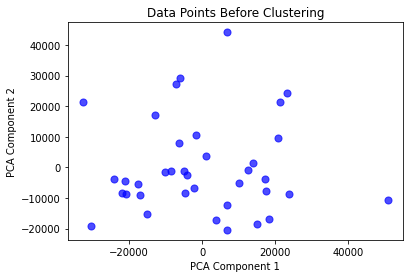

In [83]:

utils.twod(input_data)


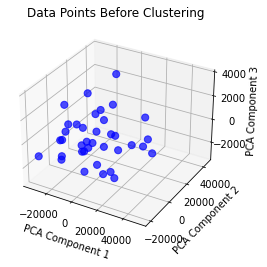

In [84]:
utils.threeD(input_data)


# dbscan


In [85]:
import math
scaler = StandardScaler()
scaled_data = scaler.fit_transform(input_data)

dist_matrics=['cosine','euclidean','manhattan','l1','l2','cityblock']
min_sample1=round(ln(input_data.shape[0]))
k1=min_sample1

min_sample2=input_data.shape[1]*2
k2=min_sample2-1

min_sample3=round(math.sqrt(scaled_data.shape[0]))
k3=min_sample3

min_sample4=round((1/2)*(scaled_data.shape[1]))
k4=min_sample4

min_sample_k={min_sample1:[k1,'round(ln(input_data.shape[0]))',"min_sample1"],
              min_sample2:[k2,'input_data.shape[1]*2','min_sample2-1'],
              min_sample3:[k3,'round(math.sqrt(scaled_data.shape[0]))','min_sample'],
              min_sample3:[k4,'round((1/2)*(scaled_data.shape[1]))','min_sample']
              }
             
data=scaled_data.copy()

utils.dbscan_on_multiple_matrics(data,dist_matrics,min_sample_k)



dist_matrics: cosine
 min_sample_k:round(ln(input_data.shape[0]))
k:min_sample1
epsilon value for metric: cosine is 0.27187044703823127 
 0    34
-1     3
Name: cluster, dtype: int64
Silhouette Score on basis of cosine: 0.33
Calinski Harabasz Score on basis of cosine: 6.50
Davies Bouldin Score on basis of cosine: 1.27
_______________________________________________________

dist_matrics: euclidean
 min_sample_k:round(ln(input_data.shape[0]))
k:min_sample1
epsilon value for metric: euclidean is 2.3488899256771303 
 0    36
-1     1
Name: cluster, dtype: int64
Silhouette Score on basis of euclidean: 0.53
Calinski Harabasz Score on basis of euclidean: 7.08
Davies Bouldin Score on basis of euclidean: 0.33
_______________________________________________________

dist_matrics: manhattan
 min_sample_k:round(ln(input_data.shape[0]))
k:min_sample1
epsilon value for metric: manhattan is 2.9350731422242977 
 0    33
-1     4
Name: cluster, dtype: int64
Silhouette Score on basis of manhattan: 0.41

In [86]:
def dbscan_on_choosen_matrics(df,matric,min_sample,k,eps):     
        model = DBSCAN(eps=eps, min_samples=min_sample, metric=matric)
        labels = model.fit_predict(df)
        clus_data=pd.DataFrame()
        clus_data['cluster']=labels 
        print(clus_data['cluster'].value_counts())
        return labels

dist_matrics='cosine'
min_sample_k=input_data.shape[1]*2
k=min_sample_k-1
epsilon=0.2856617434186718 


labels=dbscan_on_choosen_matrics(data,dist_matrics,min_sample_k,k,epsilon)


-1    37
Name: cluster, dtype: int64


In [87]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull
def twoD_data_creation_with_boundaries(labels, scaled_data):
    # Perform t-SNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, random_state=0)
    tsne_results = tsne.fit_transform(scaled_data)
    
    # Create a DataFrame for t-SNE results
    tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
    tsne_df['cluster'] = labels
    
    # Separate noise points (-1) from clusters
    noise_df = tsne_df[tsne_df['cluster'] == -1]
    clustered_df = tsne_df[tsne_df['cluster'] != -1]

    # Plot clusters with different colors
    fig = px.scatter(clustered_df, x="tsne1", y="tsne2", color='cluster', symbol='cluster',
                     width=800, height=600)
    
    # Add noise points without boundary
    fig.add_trace(go.Scatter(
        x=noise_df['tsne1'], 
        y=noise_df['tsne2'],
        mode='markers',
        marker=dict(size=8, color='black', symbol='circle'),
        name='Noise (-1)'
    ))
    
    # Add convex hull boundaries for clusters
    for cluster_id in clustered_df['cluster'].unique():
        cluster_points = clustered_df[clustered_df['cluster'] == cluster_id][['tsne1', 'tsne2']].values
        if len(cluster_points) > 2:  # ConvexHull needs at least 3 points
            hull = ConvexHull(cluster_points)
            hull_vertices = hull.vertices
            hull_points = cluster_points[hull_vertices]
            hull_points = list(hull_points) + [hull_points[0]]  # Close the loop
            
            # Add boundary line to the figure
            fig.add_trace(go.Scatter(
                x=[point[0] for point in hull_points],
                y=[point[1] for point in hull_points],
                mode='lines',
                line=dict(color='black'),
                name=f'Boundary Cluster {cluster_id}'
            ))

    # Show the figure
    fig.show()
# utils.twoD_data_creation_with_boundaries(labels, scaled_data)
twoD_data_creation_with_boundaries(labels, scaled_data)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Indexed 37 samples in 0.000s...
[t-SNE] Computed neighbors for 37 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 2.712253
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.591362
[t-SNE] KL divergence after 1000 iterations: 0.320433


In [88]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(input_data)

reversed_data=pd.DataFrame(scaler.inverse_transform(scaled_data),columns=input_data.columns)
reversed_data['cluster']=labels
clusters=list(set(labels))
cluster_mean_df=pd.DataFrame()
reversed_data.head()


,traffic_count,population,household_total_income,"Area (Land, in square miles)",population_density,cluster
0,32500.0,38010.0,18161.0,11.180,3399.821109,-1
1,49000.0,13844.0,6126.0,4.177,3314.340436,-1
2,35000.0,30138.0,12905.0,4.767,6322.215230,-1
3,38500.0,25485.0,11521.0,9.857,2585.472253,-1
4,31500.0,30935.0,9571.0,160.579,192.646610,-1


In [89]:
def cluster_features_mean(i):

        cluster_boolean_values=reversed_data['cluster']== i
        cluster_values=reversed_data[cluster_boolean_values]
        cluster_feature_mean=cluster_values.median()
        return cluster_feature_mean
for i in range(len(clusters)):

        means=cluster_features_mean(i)
        means= pd.to_numeric(means, downcast="float")
        means=round(means,0)

        cluster_mean_df[i]=means

cluster_mean_df.index


Index(['traffic_count', 'population', 'household_total_income',
       'Area (Land, in square miles)', 'population_density', 'cluster'],
      dtype='object')

In [90]:
def cluster_features_mean(i):

        cluster_boolean_values=reversed_data['cluster']== i
        cluster_values=reversed_data[cluster_boolean_values]
        cluster_feature_mean=cluster_values.median()
        return cluster_feature_mean
for i in range(len(clusters)):

        means=cluster_features_mean(i)
        means= pd.to_numeric(means, downcast="float")
        means=round(means,0)

        cluster_mean_df[i]=means

cluster_mean_df.index


Index(['traffic_count', 'population', 'household_total_income',
       'Area (Land, in square miles)', 'population_density', 'cluster'],
      dtype='object')

In [91]:
testing=cluster_mean_df.copy()
testing.drop(columns=[3],inplace=True)
testing.rename(columns={0: 'Cluster1',1: 'Cluster2',2: 'Cluster3'},inplace=True)

indexd=testing.index

def mapping(maping,key):    
            value=maping[key]
            return value

for i in indexd :
    if i == 'area_classification':
        for j in list(testing.columns):
            key=testing.loc[i,j]
            val=mapping(area_classification_mapping,key)
            testing.loc[i,j] = val
testing


KeyError: '[3] not found in axis'

In [92]:
# 2:'urban'
# 1:'suburban'
# 0:'rural'

testing['Cluster1']['area_classification']='urban'
testing['Cluster2']['area_classification']='suburban'
testing['Cluster3']['area_classification']='suburban'


KeyError: 'Cluster1'

In [23]:
testing


,0,1
household_total_income,11132.0,NaN
population_density,2585.0,NaN
"Area (Land, in square miles)",9.0,NaN
zip_code,33928.0,NaN
cluster,0.0,NaN


In [24]:
cluster_variance_df=pd.DataFrame()
def cluster_features_variance(i):
        cluster_boolean_values=reversed_data['cluster']== i
        cluster_values=reversed_data[cluster_boolean_values]
        cluster_feature_var=cluster_values.var()
        return cluster_feature_var
for i in range(len(clusters)):
        variance=cluster_features_variance(i)
        variance= pd.to_numeric(variance, downcast="float")
        variance=round(variance,0)
        cluster_variance_df[i]= variance

cluster_variance_df


,0,1
household_total_income,6778504.0,NaN
population_density,2140727.0,NaN
"Area (Land, in square miles)",88.0,NaN
zip_code,138963.0,NaN
cluster,0.0,NaN


In [25]:
reversed_data


,household_total_income,population_density,"Area (Land, in square miles)",zip_code,cluster
0,18161.0,3399.821109,11.18,34698.0,-1
1,6126.0,3311.961722,4.18,33765.0,0
2,12905.0,6318.238994,4.77,33334.0,0
3,11521.0,2584.685598,9.86,34104.0,0
4,9571.0,192.645410,160.58,33547.0,-1
5,8052.0,4702.052786,3.41,33708.0,0
6,14289.0,694.697697,41.68,33928.0,0
7,12686.0,4017.507418,6.74,34684.0,0
8,12588.0,1752.983725,16.59,33803.0,0
9,22685.0,3528.161994,16.05,33511.0,-1


In [26]:
# melted_data = reversed_data.melt(
#     id_vars=['cluster'],  # Keep clusters intact
#     value_vars=['area_classification', 'traffic_count', 'population', 'household_total_income'],  # Features to melt
#     var_name='Feature',   # New column for feature names
#     value_name='Value'    # New column for feature values
# )

# # Create the FacetGrid
# g = sns.FacetGrid(melted_data, row='cluster', col='Feature', sharex=False, margin_titles=True, height=2.5, aspect=1.5)
# g.map(sns.histplot, 'Value', kde=False, bins=30)

# # Customize titles and layout
# g.set_axis_labels("Value", "Count")
# g.set_titles(col_template="{col_name}", row_template="Cluster: {row_name}")
# g.tight_layout()
# plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Melt the DataFrame
melted_data = reversed_data.melt(
    id_vars=['cluster'],  # Keep clusters intact
    value_vars=['area_classification', 'traffic_count', 'population', 'household_total_income'],  # Features to melt
    var_name='Feature',   # New column for feature names
    value_name='Value'    # New column for feature values
)

# Create the FacetGrid with independent y-scales
g = sns.FacetGrid(
    melted_data, 
    row='cluster', 
    col='Feature', 
    sharex=False, 
    sharey=False,  # Make y-scale independent
    margin_titles=True, 
    height=2.5, 
    aspect=1.5
)
g.map(sns.histplot, 'Value', kde=True,bins=5)

# Customize titles and layout
g.set_axis_labels("Value", "Count")
g.set_titles(col_template="{col_name}", row_template="Cluster: {row_name}")
g.tight_layout()
plt.show()



KeyError: "The following 'value_vars' are not present in the DataFrame: ['area_classification', 'population', 'traffic_count']"

In [27]:
#cluster one=>
#cluster two=>
#cluster three=>



In [28]:
from scipy.stats import gaussian_kde
fig = px.histogram(
    melted_data,
    x='Value',
    color='cluster',
    facet_row='Feature',
    nbins=30,
    title="Histogram of Features by Cluster",
    category_orders={'Feature': ['area_classification', 'traffic_count', 'population', 'household_total_income']}
)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))




# Customize layout
fig.update_layout(barmode='overlay', height=800)
fig.update_yaxes(matches=None)
fig.update_traces(opacity=0.55)

fig.show()


NameError: name 'melted_data' is not defined

# kmeans


In [160]:
florida


NameError: name 'florida' is not defined

In [116]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [128]:
%store -r df 


In [148]:
%store -r df1 
df=df1.copy()


In [149]:
df.head(2)
df.dropna(inplace=True)


In [150]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


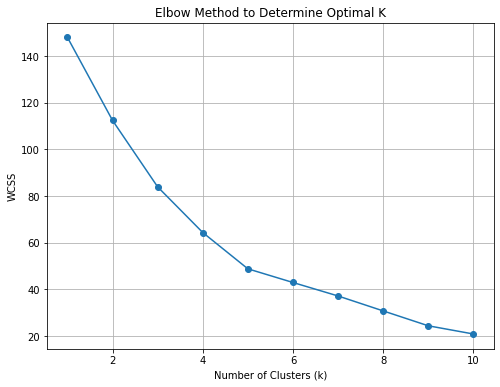

In [151]:

# df=input_data.copy()
def choose_k_elbow(scaled_data, max_k=10):
    wcss = []  # Store Within-Cluster Sum of Squares for each k

    # Test K-Means with k ranging from 1 to max_k
    for k in range(1, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, random_state=42)
        kmeans.fit(scaled_data)
        wcss.append(kmeans.inertia_)  # Inertia is the WCSS value

    # Plot the elbow curve
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_k + 1), wcss, marker='o')
    plt.title('Elbow Method to Determine Optimal K')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('WCSS')
    plt.grid()
    plt.show()
choose_k_elbow(scaled_data, max_k=10)


In [152]:



n=[]
score=[]
for i in range(2,df.shape[0]):
    k = i # Number of clusters
    kmeans = KMeans(n_clusters=k, random_state=44)  # Set random_state for reproducibility
    kmeans.fit(scaled_data)

    # 3. Add cluster labels to the original dataset
    df['Cluster'] = kmeans.labels_

    # 4. Compute the Silhouette Score
    labels = kmeans.labels_
    print(i)
    silhouette_avg = silhouette_score(scaled_data, labels)
    print(f"Silhouette Score: {silhouette_avg}")

    n.append(i)
    score.append(silhouette_avg)
max(score)



2
Silhouette Score: 0.24651756518086457
3
Silhouette Score: 0.2722820692408268
4
Silhouette Score: 0.2783116222507042
5
Silhouette Score: 0.2722573766652416
6
Silhouette Score: 0.2996683909228867
7
Silhouette Score: 0.264716958634172
8
Silhouette Score: 0.2842623512181929
9
Silhouette Score: 0.30857451502418676
10
Silhouette Score: 0.28647732490664635
11
Silhouette Score: 0.2934795627801864
12
Silhouette Score: 0.3162101952236787
13
Silhouette Score: 0.3336605947349313
14
Silhouette Score: 0.32834882609967375
15
Silhouette Score: 0.29444644461334973
16
Silhouette Score: 0.29095757004208556
17
Silhouette Score: 0.2786316568569474
18
Silhouette Score: 0.256544127905507
19
Silhouette Score: 0.24879842125330867
20
Silhouette Score: 0.2636139311066691
21
Silhouette Score: 0.25357794368385894
22
Silhouette Score: 0.24767343982446252
23
Silhouette Score: 0.24489027217008685
24
Silhouette Score: 0.2303650651658918
25
Silhouette Score: 0.23166754724531227
26
Silhouette Score: 0.2378701564802665

0.3336605947349313

In [154]:
k = 3 # Number of clusters
kmeans = KMeans(n_clusters=k, random_state=44)  # Set random_state for reproducibility
kmeans.fit(scaled_data)

# 3. Add cluster labels to the original dataset
df['Cluster'] = kmeans.labels_

# 4. Compute the Silhouette Score
labels = kmeans.labels_

silhouette_avg = silhouette_score(scaled_data, labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.2722820692408268


In [155]:
def twoD_data_ceation(labels,scaled_data):
        tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000,random_state=0)
        tsne_results = tsne.fit_transform(scaled_data)
        tsne_df = pd.DataFrame(data = tsne_results,columns=['tsne1','tsne2'])
        tsne_df = pd.concat([tsne_df, pd.DataFrame({'cluster':labels})], axis=1)
        fig = px.scatter(tsne_df,x="tsne1", y="tsne2", color='cluster',symbol='cluster',
                         color_discrete_map="identity", width=800, height=600)
        fig.show()
        
        
from sklearn.manifold import TSNE
from scipy.spatial import ConvexHull
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

def twoD_data_creation_with_boundaries(labels, scaled_data):
    # Perform t-SNE
    tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, random_state=0)
    tsne_results = tsne.fit_transform(scaled_data)
    
    # Create a DataFrame for t-SNE results
    tsne_df = pd.DataFrame(data=tsne_results, columns=['tsne1', 'tsne2'])
    tsne_df['cluster'] = labels
    # tsne_df=tsne_df[tsne_df['cluster']!=-1]
    
    # Plot points with cluster colors
    fig = px.scatter(tsne_df, x="tsne1", y="tsne2", color='cluster', symbol='cluster',
                     width=800, height=600)
    fig.update_traces(marker=dict(size=10)) 
    # Add convex hull boundaries
    for cluster_id in tsne_df['cluster'].unique():
        cluster_points = tsne_df[tsne_df['cluster'] == cluster_id][['tsne1', 'tsne2']].values
        if len(cluster_points) > 2:  # ConvexHull needs at least 3 points
            hull = ConvexHull(cluster_points)
            hull_vertices = hull.vertices
            hull_points = cluster_points[hull_vertices]
            hull_points = list(hull_points) + [hull_points[0]]  # Close the loop
            
            # Add boundary line to the figure
            fig.add_trace(go.Scatter(
                x=[point[0] for point in hull_points],
                y=[point[1] for point in hull_points],
                mode='lines',
                line=dict(color='black'),
                name=f'Boundary Cluster {cluster_id}'
            ))
    
    # Show the figure
    fig.show()


In [156]:
twoD_data_ceation(labels,scaled_data)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Indexed 37 samples in 0.000s...
[t-SNE] Computed neighbors for 37 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 2.408027
[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.852013
[t-SNE] KL divergence after 1000 iterations: 0.391167


In [157]:
twoD_data_creation_with_boundaries(labels, scaled_data)


[t-SNE] Computing 36 nearest neighbors...
[t-SNE] Indexed 37 samples in 0.000s...
[t-SNE] Computed neighbors for 37 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 37 / 37
[t-SNE] Mean sigma: 2.408027


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:793: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] KL divergence after 250 iterations with early exaggeration: 45.852013
[t-SNE] KL divergence after 1000 iterations: 0.391167


In [158]:
def pca_2d(labels, scaled_data):
    # Perform PCA
    pca = PCA(n_components=2)
    pca_results = pca.fit_transform(scaled_data)
    
    # Create a DataFrame for PCA results
    pca_df = pd.DataFrame(data=pca_results, columns=['pca1', 'pca2'])
    pca_df['cluster'] = labels
    # pca_df = pca_df[pca_df['cluster'].isin([ -1,12])]
    
    # Plot points with cluster colors
    fig = px.scatter(pca_df, x="pca1", y="pca2", color='cluster', symbol='cluster',
                     width=800, height=600)
    fig.update_traces(marker=dict(size=10)) 
    
    # Add convex hull boundaries
    for cluster_id in pca_df['cluster'].unique():
        cluster_points = pca_df[pca_df['cluster'] == cluster_id][['pca1', 'pca2']].values
        if len(cluster_points) > 2:  # ConvexHull needs at least 3 points
            hull = ConvexHull(cluster_points)
            hull_vertices = hull.vertices
            hull_points = cluster_points[hull_vertices]
            hull_points = list(hull_points) + [hull_points[0]]  # Close the loop
            
            # Add boundary line to the figure
            fig.add_trace(go.Scatter(
                x=[point[0] for point in hull_points],
                y=[point[1] for point in hull_points],
                mode='lines',
                line=dict(color='black'),
                name=f'Boundary Cluster {cluster_id}'
            ))
    
    # Show the figure
    fig.show()


In [159]:
pca_2d(df['Cluster'].values, scaled_data)


In [103]:

reversed_data=pd.DataFrame(scaler.inverse_transform(scaled_data),columns=input_data.columns)
reversed_data['cluster']=labels
clusters=list(set(labels))
cluster_mean_df=pd.DataFrame()
reversed_data.head()


,traffic_count,population,household_total_income,"Area (Land, in square miles)",population_density,cluster
0,32500.0,38010.0,18161.0,11.180,3399.821109,1
1,49000.0,13844.0,6126.0,4.177,3314.340436,0
2,35000.0,30138.0,12905.0,4.767,6322.215230,0
3,38500.0,25485.0,11521.0,9.857,2585.472253,0
4,31500.0,30935.0,9571.0,160.579,192.646610,2


In [104]:
reversed_data


,traffic_count,population,household_total_income,"Area (Land, in square miles)",population_density,cluster
0,32500.0,38010.0,18161.0,11.180,3399.821109,1
1,49000.0,13844.0,6126.0,4.177,3314.340436,0
2,35000.0,30138.0,12905.0,4.767,6322.215230,0
3,38500.0,25485.0,11521.0,9.857,2585.472253,0
4,31500.0,30935.0,9571.0,160.579,192.646610,2
5,45500.0,16034.0,8052.0,3.406,4707.574868,0
6,30000.0,28955.0,14289.0,41.681,694.681030,0
7,91500.0,27078.0,12686.0,6.736,4019.893112,0
8,36000.0,29082.0,12588.0,16.592,1752.772420,0
9,29500.0,56627.0,22685.0,16.045,3529.261452,1


In [105]:
def cluster_features_mean(i):

        cluster_boolean_values=reversed_data['cluster']== i
        cluster_values=reversed_data[cluster_boolean_values]
        cluster_feature_mean=cluster_values.median()
        return cluster_feature_mean
for i in range(len(clusters)):

        means=cluster_features_mean(i)
        means= pd.to_numeric(means, downcast="float")
        means=round(means,0)

        cluster_mean_df[i]=means

cluster_mean_df.index


Index(['traffic_count', 'population', 'household_total_income',
       'Area (Land, in square miles)', 'population_density', 'cluster'],
      dtype='object')

In [106]:
def cluster_features_mean(i):

        cluster_boolean_values=reversed_data['cluster']== i
        cluster_values=reversed_data[cluster_boolean_values]
        cluster_feature_mean=cluster_values.median()
        return cluster_feature_mean
for i in range(len(clusters)):

        means=cluster_features_mean(i)
        means= pd.to_numeric(means, downcast="float")
        means=round(means,0)

        cluster_mean_df[i]=means

cluster_mean_df.index


Index(['traffic_count', 'population', 'household_total_income',
       'Area (Land, in square miles)', 'population_density', 'cluster'],
      dtype='object')

In [107]:
# input_data['area_classification']=input_data['area_classification'].astype('category')
# area_classification_mapping=dict(enumerate(input_data['area_classification'].cat.categories ))


In [43]:
testing


,0,1
household_total_income,11132.0,NaN
population_density,2585.0,NaN
"Area (Land, in square miles)",9.0,NaN
zip_code,33928.0,NaN
cluster,0.0,NaN


In [44]:
testing=cluster_mean_df.copy()
# testing.drop(columns=[3],inplace=True)
testing.rename(columns={0: 'Cluster1',1: 'Cluster2',2: 'Cluster3'},inplace=True)

indexd=testing.index

def mapping(maping,key):    
            value=maping[key]
            return value

for i in indexd :
    if i == 'area_classification':
        for j in list(testing.columns):
            key=testing.loc[i,j]
            val=mapping(area_classification_mapping,key)
            testing.loc[i,j] = val
testing


,Cluster1,Cluster2,Cluster3
household_total_income,11521.0,16926.0,9571.0
population_density,2585.0,2728.0,193.0
"Area (Land, in square miles)",11.0,12.0,161.0
zip_code,33954.0,32622.0,33547.0
cluster,0.0,1.0,2.0


In [45]:
print('traffic_count')
print(input_data['traffic_count'].min())
print(input_data['traffic_count'].max())
print('population')
print(input_data['population'].min())
print(input_data['population'].max())
print('household_total_income')
print(input_data['household_total_income'].min())
print(input_data['household_total_income'].max())


traffic_count


KeyError: 'traffic_count'

In [46]:
cluster_variance_df=pd.DataFrame()
def cluster_features_variance(i):
        cluster_boolean_values=reversed_data['cluster']== i
        cluster_values=reversed_data[cluster_boolean_values]
        cluster_feature_var=cluster_values.var()
        return cluster_feature_var
for i in range(len(clusters)):
        variance=cluster_features_variance(i)
        variance= pd.to_numeric(variance, downcast="float")
        variance=round(variance,0)
        cluster_variance_df[i]= variance

cluster_variance_df


,0,1,2
household_total_income,12351539.0,36180148.0,NaN
population_density,1552434.0,3319286.0,NaN
"Area (Land, in square miles)",244.0,101.0,NaN
zip_code,126239.0,274414.0,NaN
cluster,0.0,0.0,NaN


In [47]:
melted_data = reversed_data.melt(
    id_vars=['cluster'],  # Keep clusters intact
    value_vars=['area_classification', 'traffic_count', 'population', 'household_total_income'],  # Features to melt
    var_name='Feature',   # New column for feature names
    value_name='Value'    # New column for feature values
)

# Create the FacetGrid with independent y-scales
g = sns.FacetGrid(
    melted_data, 
    row='cluster', 
    col='Feature', 
    sharex=False, 
    sharey=False,  # Make y-scale independent
    margin_titles=True, 
    height=2.5, 
    aspect=1.5
)
g.map(sns.histplot, 'Value', kde=True,bins=5)

# Customize titles and layout
g.set_axis_labels("Value", "Count")
g.set_titles(col_template="{col_name}", row_template="Cluster: {row_name}")
g.tight_layout()
plt.show()


KeyError: "The following 'value_vars' are not present in the DataFrame: ['area_classification', 'population', 'traffic_count']"

In [48]:
from scipy.stats import gaussian_kde
fig = px.histogram(
    melted_data,
    x='Value',
    color='cluster',
    facet_row='Feature',
    nbins=30,
    title="Histogram of Features by Cluster",
    category_orders={'Feature': ['area_classification', 'traffic_count', 'population', 'household_total_income']}
)

fig.for_each_annotation(lambda a: a.update(text=a.text.split("=")[-1]))




# Customize layout
fig.update_layout(barmode='overlay', height=800)
fig.update_yaxes(matches=None)
fig.update_traces(opacity=0.55)

fig.show()


NameError: name 'melted_data' is not defined

In [ ]:
input_data['clusters']=labels


In [48]:
input_data.columns



Index(['area_classification', 'traffic_count', 'population',
       'household_total_income', 'clusters'],
      dtype='object')

# revenue analysis


In [1]:

import glob
import os
import pandas as pd

# Define the folder path
folder_path = "../data/revenue_data/drive-download-20250312T064938Z-001/"  

# Get a list of all CSV files in the folder
csv_files = glob.glob(os.path.join(folder_path, "*.csv"))

# Read all CSV files and concatenate them into a single DataFrame
df_list = [pd.read_csv(file) for file in csv_files]  # Read all files into DataFrames
final_df = pd.concat(df_list, ignore_index=True)  # Concatenate into a single DataFrame
final_df.head(3)


,StoreID,TransactionDate,TicketSeq,Channel,Category,ItemName,Quantity,BasePrice,NetSales
0,FL032,1/1/2024 11:07:43 AM,255714,ItsACheckmate,Pizza,CYO,1.0,19.09,41.17
1,FL032,1/1/2024 11:07:43 AM,255714,ItsACheckmate,Pizza,CYO,1.0,19.09,41.17
2,FL032,1/1/2024 11:09:15 AM,255715,,Pizza,CYO,1.0,16.49,20.98


In [3]:
florida=pd.read_csv('florida_store_details.csv')
florida.head(2)


,*monday lobby,*tuesday lobby,*wednesday lobby,*thursday lobby,*friday lobby,*saturday lobby,*sunday lobby,text_to_order_url,text_to_order_note,*ordering_url,...,*zip_code,store_local_reference,*store_phone,companymanaged,dma,timezone,latitude,longitude,opendate,StoreID
0,10:00:00-22:00:00,10:00:00-22:00:00,10:00:00-22:00:00,10:00:00-22:00:00,10:00:00-23:00:00,10:00:00-23:00:00,10:00:00-22:00:00,https://www.jetspizza.com/textorder/?jets_id=F...,Text your order to get 15% off menu-priced pizza,https://ordering.jetspizza.com/?uniqueStoreIde...,...,34698,NaN,7272101840,False,Tampa-St. Petersburg (Sarasota),Eastern (UTC -5 / -4),28.019467,-82.769442,12/20/2005,FL10
1,10:00:00-22:00:00,10:00:00-22:00:00,10:00:00-22:00:00,10:00:00-22:00:00,10:00:00-00:00:00,10:00:00-00:00:00,10:00:00-23:00:00,https://www.jetspizza.com/textorder/?jets_id=F...,Text your order to get 15% off menu-priced pizza,https://ordering.jetspizza.com/?uniqueStoreIde...,...,33765,NaN,7274414464,False,Tampa-St. Petersburg (Sarasota),Eastern (UTC -5 / -4),27.960481,-82.752473,11/3/2004,FL09


In [7]:
final_df['StoreID']= final_df["StoreID"].astype(str).str.strip()


In [8]:

merged_df = pd.merge(final_df, florida, on='StoreID', how='left', indicator=True)


In [10]:
merged_df.columns


Index(['StoreID', 'TransactionDate', 'TicketSeq', 'Channel', 'Category',
       'ItemName', 'Quantity', 'BasePrice', 'NetSales', '*monday lobby',
       '*tuesday lobby', '*wednesday lobby', '*thursday lobby',
       '*friday lobby', '*saturday lobby', '*sunday lobby',
       'text_to_order_url', 'text_to_order_note', '*ordering_url', 'status',
       'pro_order_url', 'pro_order_note', '*ordering_platform', 'possystem',
       '*name', '*address_1', 'address_2', '*city', '*state', '*zip_code',
       'store_local_reference', '*store_phone', 'companymanaged', 'dma',
       'timezone', 'latitude', 'longitude', 'opendate', '_merge'],
      dtype='object')

In [12]:
merged_df['_merge'].unique()


['both', 'left_only']
Categories (3, object): ['left_only', 'right_only', 'both']

In [13]:
final_df['StoreID'].unique()


array(['FL032', 'FL33', 'FL-025', 'FL31', '12766', 'FL018', 'FL030',
       'FL024', 'FL008', '12866', 'FL035', '13072', 'FL09', 'FL037',
       'FL023', '16', 'FL045', 'FL044', 'FL046', 'FL-047', 'FL043',
       'FL041', 'FL048', 'FL013', 'FL10', 'FL038', 'FL-039', 'FL05',
       'FL029', 'FL15', 'FL016', 'FL17'], dtype=object)

In [15]:

merged_df[merged_df['_merge']=='both']['StoreID'].nunique()


31

In [16]:
merged_df.to_csv('jets_rev_store_detail.csv',index=False)


In [132]:
# codes={'FL10': 34698,
#  'FL09': 33765,
#  'FL05': 33334,
#  'FL013': 34104,
#  'FL014': 33547,
#  'FL15': 33708,
#  'FL016': 33928,
#  'FL008': 34684,
#  'FL17': 33803,
#  'FL018': 33511,
#  '12766': 32225,
#  '12866': 32541,
#  '13072': 33991,
#  '16': 33907,
#  'FL023': 34108,
#  'FL024': 32703,
#  'FL-025': 33903,
#  'FL029': 33434,
#  'FL030': 33065,
#  'FL032': 33411,
#  'FL33': 33060,
#  'FL31': 33904,
#  'FL035': 33618,
#  'FL037': 33328,
#  'FL038': 34134,
#  'FL-039': 33954,
#  'FL041': 33809,
#  'FL043': 34119,
#  'FL044': 32504,
#  'FL045': 33770,
#  'FL046': 34761,
#  'FL047': 32257,
#  'FL048': 32073}


In [124]:
# final_df["StoreID"] = final_df["StoreID"].astype(str).str.strip()
# final_df['zip_code']=final_df['StoreID'].map(codes)
# final_df['zip_code'].unique()


array([33411., 33060., 33903., 33904., 32225., 33511., 33065., 32703.,
       34684., 32541., 33618., 33991., 33765., 33328., 34108., 33907.,
       33770., 32504., 34761.,    nan, 34119., 33809., 32073., 34104.,
       34698., 34134., 33954., 33334., 33434., 33708., 33928., 33803.])

In [127]:
# final_df['StoreID'].nunique()


32

In [128]:
# final_df['zip_code'].nunique()


31

In [116]:
# Calculate Gross Revenue
final_df["GrossRevenue"] = final_df["Quantity"] * final_df["BasePrice"]

# Summarize Revenue per Item
store_revenue = final_df.groupby(['StoreID','zip_code'])[['NetSales']].sum().reset_index()

store_revenue


,StoreID,zip_code,NetSales
0,12766,32225.0,3.597627e+06
1,12866,32541.0,2.905546e+06
2,13072,33991.0,4.797419e+06
3,16,33907.0,6.410395e+06
4,FL-025,33903.0,5.840163e+06
5,FL-039,33954.0,3.358276e+06
6,FL008,34684.0,4.192949e+06
7,FL013,34104.0,5.054688e+06
8,FL016,33928.0,5.252443e+06
9,FL018,33511.0,3.061104e+06


In [121]:
final_df


,StoreID,TransactionDate,TicketSeq,Channel,Category,ItemName,Quantity,BasePrice,NetSales,GrossRevenue,zip_code
0,FL032,1/1/2024 11:07:43 AM,255714,ItsACheckmate,Pizza,CYO,1.0,19.09,41.17,19.09,33411.0
1,FL032,1/1/2024 11:07:43 AM,255714,ItsACheckmate,Pizza,CYO,1.0,19.09,41.17,19.09,33411.0
2,FL032,1/1/2024 11:09:15 AM,255715,,Pizza,CYO,1.0,16.49,20.98,16.49,33411.0
3,FL032,1/1/2024 11:09:15 AM,255715,,Jet's Bread,Deep Dish Bread,1.0,8.99,20.98,8.99,33411.0
4,FL032,1/1/2024 11:29:00 AM,255716,Speed Dine,Jet's Bread,Deep Dish Bread,1.0,8.99,16.98,8.99,33411.0
...,...,...,...,...,...,...,...,...,...,...,...
3079000,FL17,12/31/2024 9:27:25 PM,485230,,Beverage,Dr. Pepper,1.0,1.99,8.49,1.99,33803.0
3079001,FL17,12/31/2024 9:27:25 PM,485230,,Sides,Ranch Dip,1.0,1.00,8.49,1.00,33803.0
3079002,FL17,12/31/2024 9:30:54 PM,485231,,Pizza,CYO,1.0,16.49,15.99,16.49,33803.0
3079003,FL17,12/31/2024 9:45:18 PM,485232,,Pizza,CYO,1.0,16.49,31.98,16.49,33803.0


In [97]:
final_df.columns


Index(['StoreID', 'TransactionDate', 'TicketSeq', 'Channel', 'Category',
       'ItemName', 'Quantity', 'BasePrice', 'NetSales', 'GrossRevenue',
       'zip_code'],
      dtype='object')

(38, 5)

In [ ]:
input_data['clusters']=labels
input_data.head()


,zip_code,area_classification,traffic_count,population,household_total_income,clusters
0,34698,2,32500.0,38010,18161,0
1,33765,2,49000.0,13844,6126,0
2,33334,2,35000.0,30138,12905,0
3,34104,1,38500.0,25485,11521,1
4,33547,1,31500.0,30935,9571,1


In [40]:
final_df.columns


Index(['StoreID', 'TransactionDate', 'TicketSeq', 'Channel', 'Category',
       'ItemName', 'Quantity', 'BasePrice', 'NetSales'],
      dtype='object')

In [39]:
combined_df = pd.merge(final_df, input_data, on="zip_code", how="left")
combined_df


KeyError: 'zip_code'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



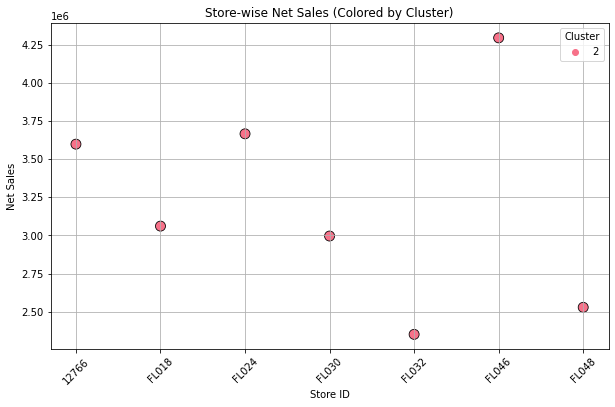

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



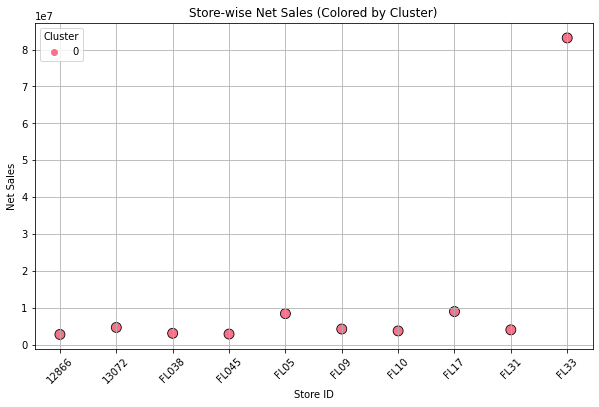

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



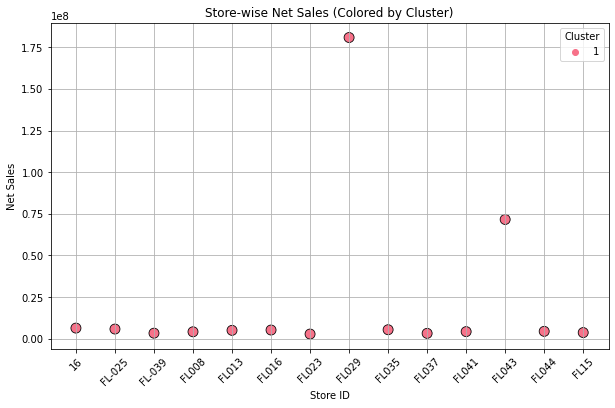

In [120]:
for i in list(combined_df["clusters"].unique()):
    df=combined_df[combined_df['clusters']==i]
    # # 🔹 Convert StoreID to string for proper plotting
    df["StoreID"]=df["StoreID"].astype(str)


    # 🔹 Define color palette
    palette = sns.color_palette("husl", n_colors=df["clusters"].nunique())

    # 🔹 Scatter Plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x="StoreID", y="NetSales", hue="clusters", palette=palette, s=100, edgecolor="black")

    # Formatting
    plt.xlabel("Store ID")
    plt.ylabel("Net Sales")
    plt.title("Store-wise Net Sales (Colored by Cluster)")
    plt.xticks(rotation=45)  # Rotate store labels for better readability
    plt.legend(title="Cluster")
    plt.grid(True)

    plt.show()
